In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_11d6882aba4a4088b92e5b1911d45304 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tLNqnn7kqNA1hXnNqcW7zGHMgcYqeXVV5meqI0ZRnSo0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_11d6882aba4a4088b92e5b1911d45304.get_object(Bucket='flightpriceprediction-donotdelete-pr-y3oeapi2czacmr',Key='Data_Train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
#information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Creating list of Category Columns

category=['Airline','Source','Destination','Additional_Info']


In [9]:
category

['Airline', 'Source', 'Destination', 'Additional_Info']

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:


category_cols=data.select_dtypes(include=['object']).columns


In [13]:
category_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [14]:
for i in category:
    print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


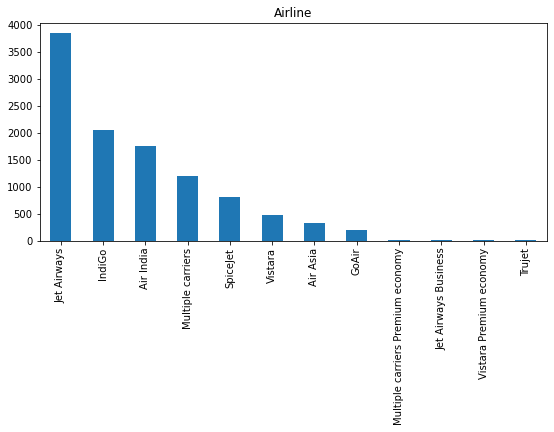

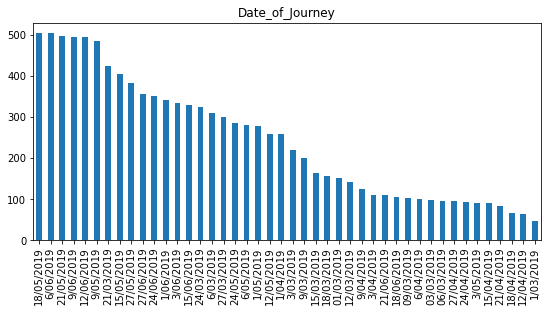

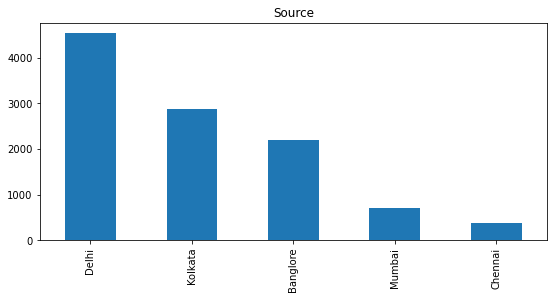

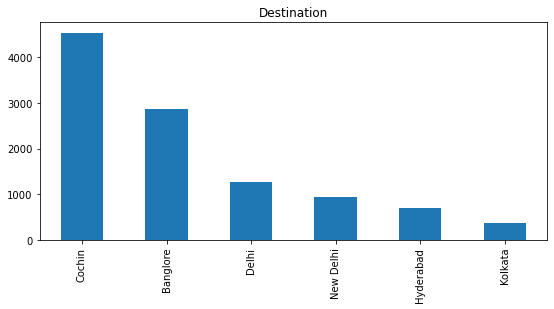

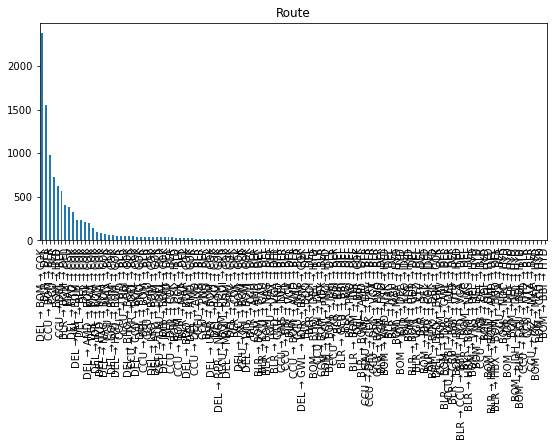

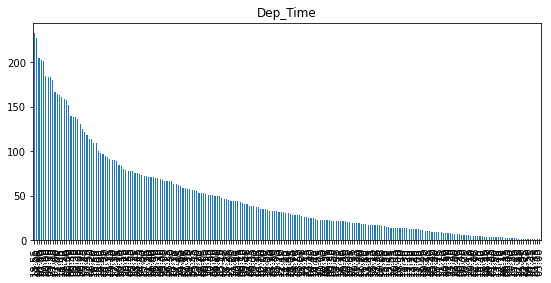

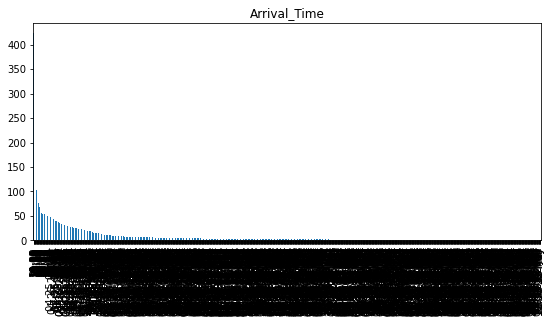

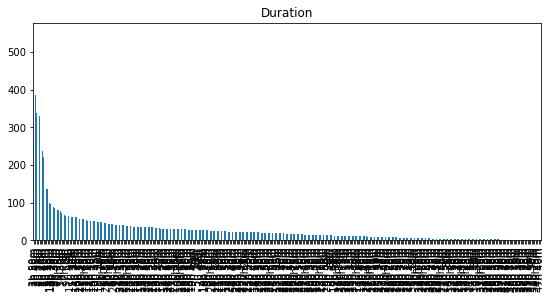

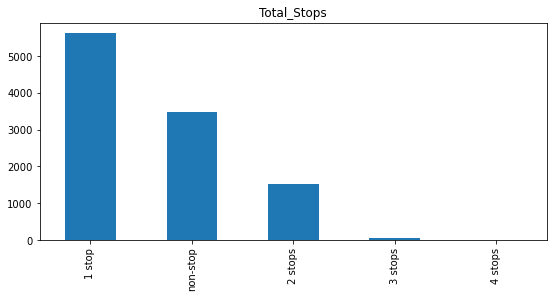

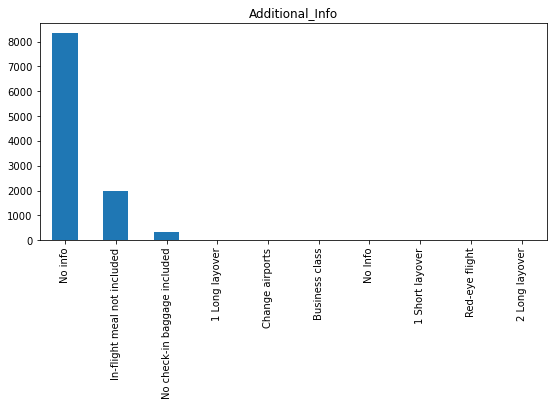

In [15]:
#plotting a barchart for each of the categorical value
for column in category_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [16]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
#Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns –

data.Route=data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [18]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [19]:
#We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [20]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [21]:
#Treating the data_column


data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [22]:
#In the similar manner, we split the Dep_time column, and create separate columns for departure hours and minutes –
data.Dep_Time=data.Dep_Time.str.split(':')

In [23]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

Further, for the arrival date and arrival time separation, we split the ‘Arrival_Time’ column, and create ‘Arrival_date’ column. We also split the time and divide it into ‘Arrival_time_hours’ and ‘Arrival_time_minutes’, similar to what we did with the ‘Dep_time’ column –

In [24]:

data.Arrival_Time=data.Arrival_Time.str.split(' ')


In [25]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [26]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')


In [27]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [28]:
#Next, we divide the ‘Duration’ column to ‘Travel_hours’ and ‘ Travel_mins’

data.Duration=data.Duration.str.split(' ')

In [29]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [30]:
#We also treat the ‘Total_stops’ column, and replace non-stop flights with 0 value and extract the integer part of the ‘Total_Stops’ column –
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]


In [31]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [32]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [33]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
City1                    0
City2                    0
City3                 3491
City4                 9116
City5                10636
City6                10681
Date                     0
Month                    0
Year                     0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [34]:
#We also drop some columns like ‘city6’ and ‘city5’, since majority of the data in these columns was NaN(null)
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [35]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1, inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

### Replacing The Missing Values

In [36]:
#Checking Null Values
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
City1                   0
City2                   0
City3                3491
Date                    0
Month                   0
Year                    0
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [37]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
City1                   0
City2                   0
City3                3491
Date                    0
Month                   0
Year                    0
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [38]:
#filling City3 as None, the missing values are less
data['City3'].fillna('None',inplace=True)

In [39]:
#filling Arrival_Date as Departure_Date
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [40]:
#filling Travel_Mins as Zero(0)
data['Travel_Mins'].fillna(0,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   City1              10682 non-null  object
 7   City2              10682 non-null  object
 8   City3              10682 non-null  object
 9   Date               10682 non-null  object
 10  Month              10682 non-null  object
 11  Year               10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  object
 13  Dep_Time_Mins      10682 non-null  object
 14  Arrival_date       10682 non-null  object
 15  Arrival_Time_Hour  10682 non-null  object
 16  Arrival_Time_Mins  10682 non-null  objec

In [42]:
#changing the numerical columns from object to int
#data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype("int64")
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
#data.Travel_Hours=data.Travel_Hours.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

During this step, we face issue converting the ‘Travel_hours’ column, saying that the column has data as ‘5m’, which is not allowing its conversion to ‘int’.

In [43]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,BOM,GOI,PNQ,6,3,2019,16,50,6,16,55,5m,0


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot fly from BOMBAY->GOA->PUNE->HYDERABAD in 5 mins! (The flight has ‘Total_stops’ as 2)

We then convert the ‘Travel_hours’ column to ‘int’ data type, and the operation happens successfully.

We now have a treated dataset with 10682 rows and 16 columns (15 independent and 1 dependent variable).

We create separate lists of categorical columns and numerical columns for plotting and analyzing the data –

In [44]:
data.drop(index=6474,inplace=True,axis=0)

In [45]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [46]:
#Creating list of Different types of columns
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour',
           'Arrival_Time_Mins','Travel_Hours','Travel_Mins']

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

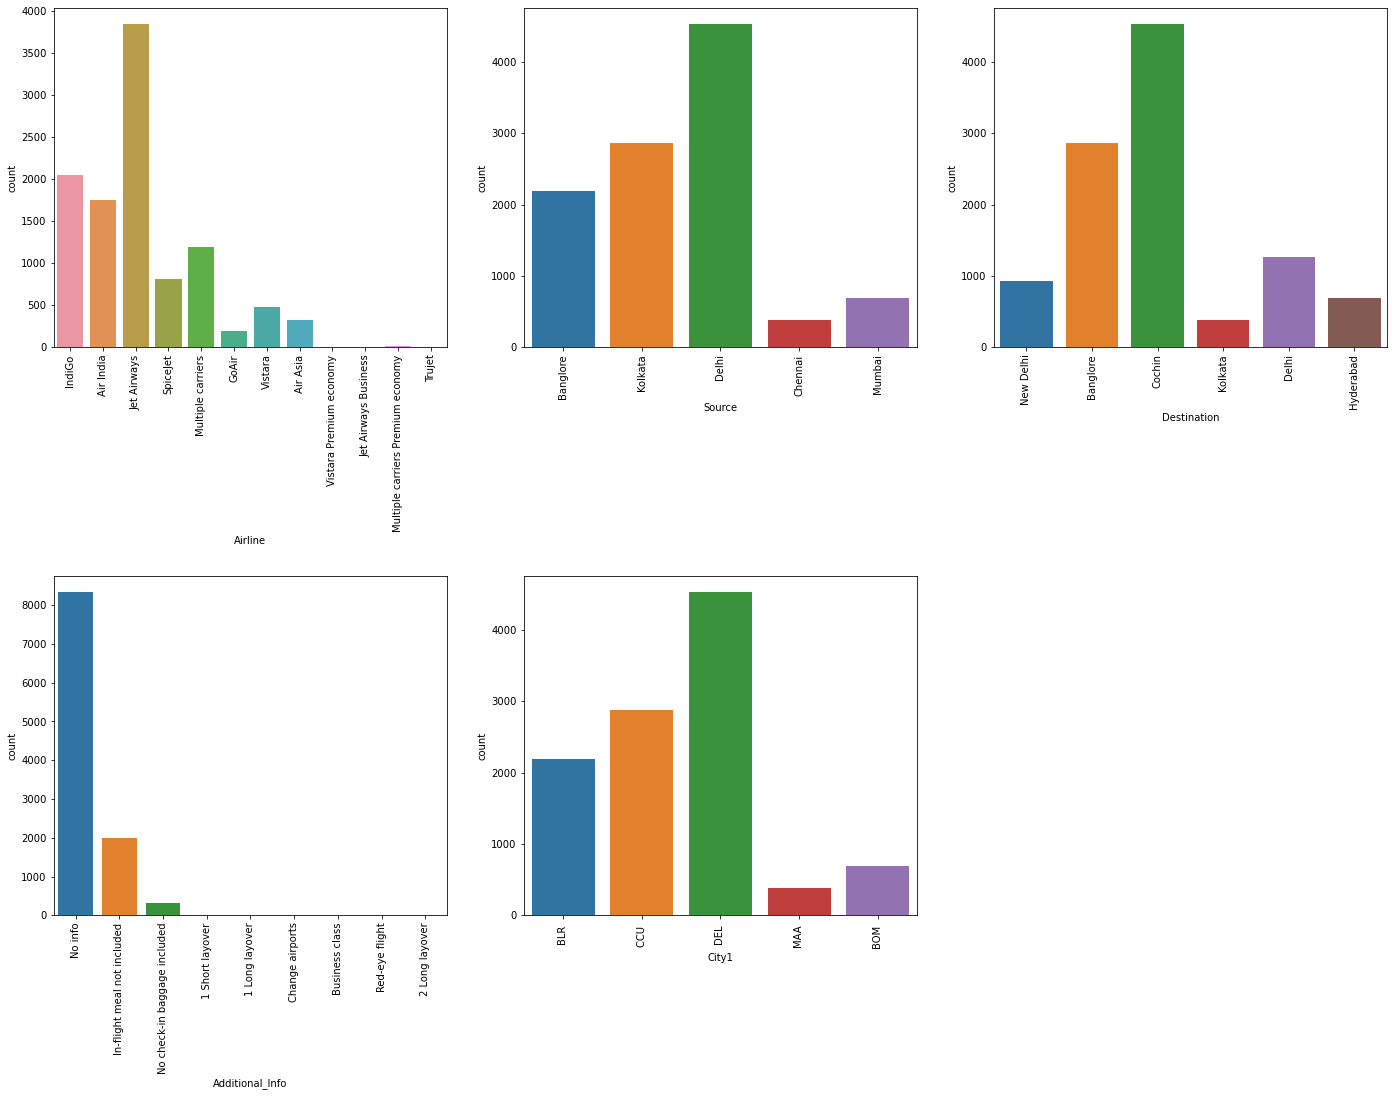

In [47]:
#plotting Countplots for Categorical Data

import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

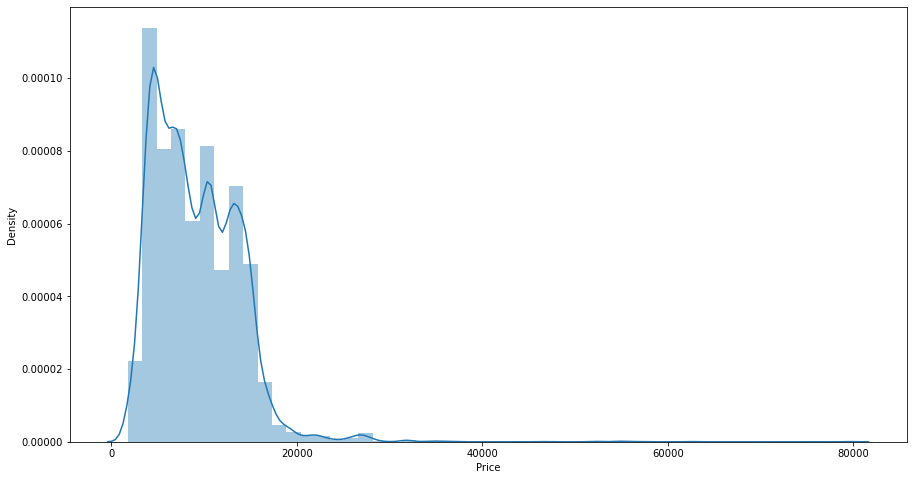

In [48]:
#Distribution of 'PRICE' Column
plt.figure(figsize=(15,8))
sns.distplot(data.Price)


Majority of the flights have price range between 1759–20k, and number of flights having prices greater than 20k are quite less. Price range is skewed towards right.

We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.

In [49]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'City1', 'City2', 'City3', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Mins', 'Travel_Hours', 'Travel_Mins'],
      dtype='object')

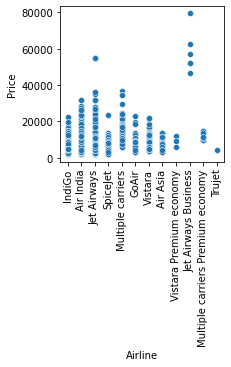

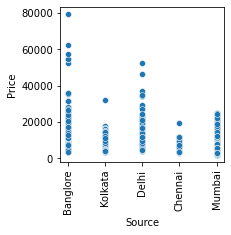

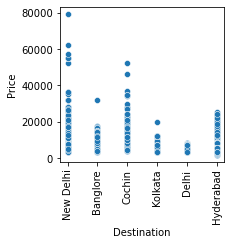

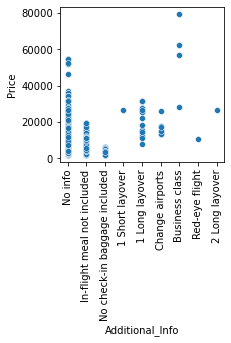

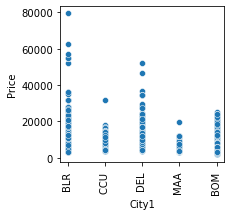

In [50]:
#Checking the relation of Price with Categorical data

import seaborn as sns
c=1

for i in categorical:
    plt.figure(figsize = (10,20))

    plt.subplot(6,3,c)
    
    sns.scatterplot(x=data[i],y=data.Price)
    plt.xticks(rotation=90)
    #plt.tight_layout(pad=3.0)
    c=c+1
    plt.show()
    

In [51]:
#Checking Flight with high Prices
data[data.Price>50000]
data.head()
pd.set_option('display.max_columns',25)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR,DEL,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,1,21,35,4,45


In [52]:
data['Year'].max()

2019

<AxesSubplot:>

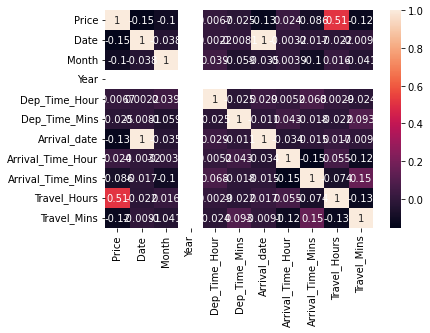

In [53]:
sns.heatmap(data.corr(),annot=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10681 non-null  object
 1   Source             10681 non-null  object
 2   Destination        10681 non-null  object
 3   Total_Stops        10681 non-null  object
 4   Additional_Info    10681 non-null  object
 5   Price              10681 non-null  int64 
 6   City1              10681 non-null  object
 7   City2              10681 non-null  object
 8   City3              10681 non-null  object
 9   Date               10681 non-null  int64 
 10  Month              10681 non-null  int64 
 11  Year               10681 non-null  int64 
 12  Dep_Time_Hour      10681 non-null  int64 
 13  Dep_Time_Mins      10681 non-null  int64 
 14  Arrival_date       10681 non-null  int64 
 15  Arrival_Time_Hour  10681 non-null  int64 
 16  Arrival_Time_Mins  10681 non-null  int64

In [55]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR,DEL,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,CCU,BLR,None,9,4,2019,19,55,9,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,CCU,BLR,None,27,4,2019,20,45,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,BLR,DEL,None,27,4,2019,8,20,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,BLR,DEL,None,1,3,2019,11,30,1,14,10,2,40


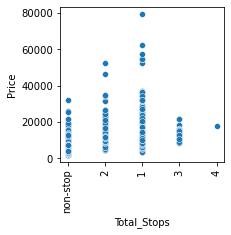

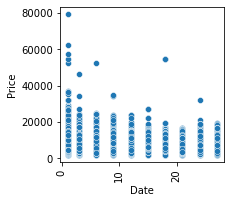

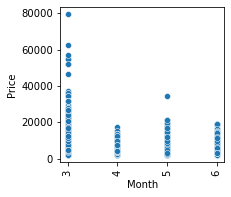

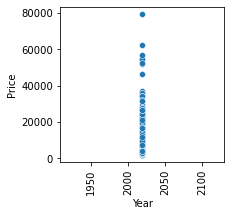

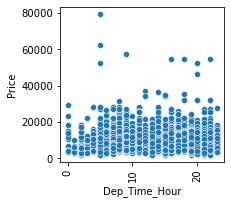

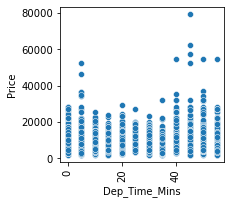

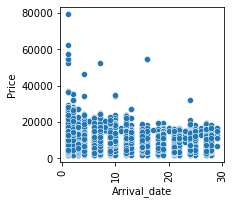

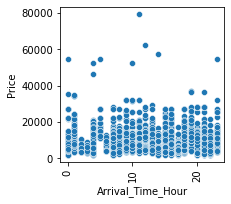

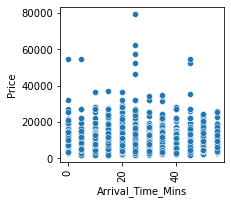

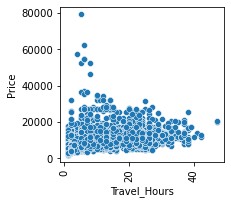

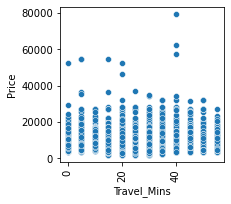

In [56]:
#Checking Relation Price with Numerical values
c=1

for i in numerical:
    plt.figure(figsize=(10,20))
    plt.subplot(6,3,c)
    sns.scatterplot(x = data[i], y=data.Price)
    plt.xticks(rotation=90)
    #plt.tight_layout(pad=3.0)
    c=c+1
    plt.show()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

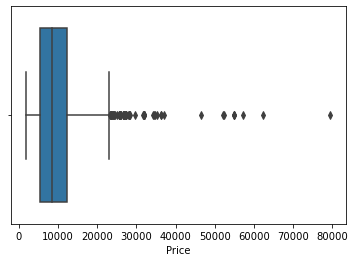

In [57]:
# Detecting the Outliers
import seaborn as sns
sns.boxplot(data['Price'])
    

### Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1	=le.fit_transform(data.City1	)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,0,13,29,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,2,25,1,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,3,32,4,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,2,34,3,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,0,34,8,1,3,2019,16,50,1,21,35,4,45


### Scaling the Data

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

ds_x=data.drop('Price',axis=1)
y=data['Price']


In [61]:
x=pd.DataFrame(ss.fit_transform(ds_x),columns=ds_x.columns)


In [62]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,-0.410934,-1.658354,2.416648,1.407125,0.498678,-1.674246,0.137694,1.395207,1.237192,-1.467619,0.0,1.654162,-0.234832,0.955658,-1.800328,-0.889941,-0.970748,1.278965
1,-1.261305,0.890262,-0.973718,-0.253716,0.498678,-0.016145,1.636509,-1.082197,-1.475375,0.250165,0.0,-1.303018,1.363790,-1.524701,-0.050871,-0.586988,-0.382120,-0.196456
2,0.014251,0.040723,-0.295645,-0.253716,0.498678,0.812906,2.510817,-0.816761,-0.531874,1.109057,0.0,-0.607211,0.031605,-0.461690,-1.362964,0.018919,1.030586,-1.671877
3,-0.410934,0.890262,-0.973718,-0.807329,0.498678,-0.016145,2.760619,-0.905240,-0.178060,0.250165,0.0,0.958355,-1.034142,-0.225465,1.407010,0.321872,-0.617571,-0.196456
4,-0.410934,-1.658354,2.416648,-0.807329,0.498678,-1.674246,2.760619,-0.462846,-1.475375,-1.467619,0.0,0.610452,1.363790,-1.524701,1.115434,0.624825,-0.735297,0.983881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,-1.686491,0.890262,-0.973718,1.407125,0.498678,-0.016145,-0.861515,1.395207,-0.531874,-0.608727,0.0,1.132307,1.630227,-0.579802,1.261222,0.018919,-0.970748,0.098628
10677,-1.261305,0.890262,-0.973718,1.407125,0.498678,-0.016145,-0.861515,1.395207,1.591005,-0.608727,0.0,1.306259,1.097353,1.546220,1.407010,-0.284035,-0.970748,0.393713
10678,0.014251,-1.658354,0.382428,1.407125,0.498678,-1.674246,0.137694,1.395207,1.591005,-0.608727,0.0,-0.781163,-0.234832,1.546220,-0.342447,-0.284035,-0.853022,-1.671877
10679,2.565364,-1.658354,2.416648,1.407125,0.498678,-1.674246,0.137694,1.395207,-1.475375,-1.467619,0.0,-0.259307,0.298042,-1.524701,0.094917,-0.889941,-0.970748,0.688797


We use the below mentioned code snipped to fit the data into ML models and predict the output –

### Output  Columns

In [63]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,0,13,29,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,2,25,1,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,3,32,4,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,2,34,3,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,0,34,8,1,3,2019,16,50,1,21,35,4,45


In [64]:

col=pd.DataFrame(data,columns=['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price'])
pd.DataFrame(data)
col.head()


,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [65]:
x = data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]

In [66]:
x.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [67]:
x.shape

(10681, 12)

In [68]:
### Scaling the Data

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

y = x['Price']
x = x.drop(columns=['Price'],axis=1)


In [70]:
names = x.columns

In [71]:
x = ss.fit_transform(x)

In [72]:
x = pd.DataFrame(x,columns=names)

In [73]:
x

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
0,-0.410934,-1.658354,2.416648,1.237192,-1.467619,0.0,1.654162,-0.234832,0.955658,-1.800328,-0.889941
1,-1.261305,0.890262,-0.973718,-1.475375,0.250165,0.0,-1.303018,1.363790,-1.524701,-0.050871,-0.586988
2,0.014251,0.040723,-0.295645,-0.531874,1.109057,0.0,-0.607211,0.031605,-0.461690,-1.362964,0.018919
3,-0.410934,0.890262,-0.973718,-0.178060,0.250165,0.0,0.958355,-1.034142,-0.225465,1.407010,0.321872
4,-0.410934,-1.658354,2.416648,-1.475375,-1.467619,0.0,0.610452,1.363790,-1.524701,1.115434,0.624825
...,...,...,...,...,...,...,...,...,...,...,...
10676,-1.686491,0.890262,-0.973718,-0.531874,-0.608727,0.0,1.132307,1.630227,-0.579802,1.261222,0.018919
10677,-1.261305,0.890262,-0.973718,1.591005,-0.608727,0.0,1.306259,1.097353,1.546220,1.407010,-0.284035
10678,0.014251,-1.658354,0.382428,1.591005,-0.608727,0.0,-0.781163,-0.234832,1.546220,-0.342447,-0.284035
10679,2.565364,-1.658354,2.416648,-1.475375,-1.467619,0.0,-0.259307,0.298042,-1.524701,0.094917,-0.889941


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()


In [76]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
        
        print("R2 score is",r2_score(y_test,y_pred))
        print("R2 for train data",r2_score(y_train, i.predict(x_train)))
        print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
        print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
        print("Root Mean Sqaured Error is", (mean_squared_error(y_pred,y_test,squared=False)))


RandomForestRegressor()
R2 score is 0.8257576815982792
R2 for train data 0.9515977600975416
Mean Absolute Error is 1181.8755697754257
Mean Squared Error is 3678562.180511524
Root Mean Sqaured Error is 1917.957815102179
GradientBoostingRegressor()
R2 score is 0.7647446016278976
R2 for train data 0.7333243455087604
Mean Absolute Error is 1678.5550101199212
Mean Squared Error is 4966655.742134811
Root Mean Sqaured Error is 2228.599502408365
AdaBoostRegressor()
R2 score is 0.2282986902977775
R2 for train data 0.25463358232400046
Mean Absolute Error is 3307.0979599343855
Mean Squared Error is 16291973.606417377
Root Mean Sqaured Error is 4036.331701733317


In [77]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())
    

RandomForestRegressor() 0.7924125914002996
RandomForestRegressor() 0.7937555071487714
RandomForestRegressor() 0.7991811588717549


In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],
            'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=50; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=70; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=70; total time=   0.2s
[CV] END ....max_depth=3, max_features=auto, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=auto, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=auto, n_es

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [80]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

gb_res.fit(x_train,y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....max_depth=1, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=1, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=1, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=3, max_features=auto, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=3, max_features=auto, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=3, max_features=auto, n_estimators=30; total time=   0.1s
[CV] END ....max_depth=3, max_features=auto, n_estimators=70; total time=   0.3s
[CV] END ....max_depth=3, max_features=auto, n_estimators=70; total time=   0.3s
[CV] END ....max_depth=3, max_features=auto, n_estimators=70; total time=   0.3s
[CV] END ....max_depth=1, max_features=auto, n_estimators=30; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_estimators=30; total time=   0.0s
[CV] END ....max_depth=1, max_features=auto, n_e

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [81]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9292503810305048
test accuracy 0.7683322118780398


In [82]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(gb,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7264816786815168
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7287887852835201
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7280385866823946


In [83]:
gb=GradientBoostingRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
gb.fit(x_train,y_train)
y_train_pred=gb.predict(x_train)
y_test_pred=gb.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.6362472610138679
test accuracy 0.2546064503570954


In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 Score is',r2_score(y_test,y_pred))
        print('R2 Score for train data',r2_score(y_train,i.predict(x_train)))
        print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
        print('Root Mean Squared Error is',(mean_squared_error(y_test,y_pred,squared=False)))
        

KNeighborsRegressor()
R2 Score is 0.7357369816529409
R2 Score for train data 0.7900498333828809
Mean Absolute Error is 1635.1700514740292
Mean Squared Error is 5579057.681946654
Root Mean Squared Error is 2362.0028962612755
SVR()
R2 Score is -0.007934481035057894
R2 Score for train data -0.012381130959185693
Mean Absolute Error is 3631.923243955232
Mean Squared Error is 21279271.857602067
Root Mean Squared Error is 4612.94611475162


In [85]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8820379322359039
test accuracy 0.6854801361938638


In [86]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(knn,x,y,cv=i)
    print(knn,cv.mean())

KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.630633801839191
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6447308601134175
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6645557655070159


In [87]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [88]:
predicted_values

,Actual,Predicted
4830,7476,6565.0
3771,7927,8295.0
1523,5963,12032.0
3393,16289,12898.0
4169,8016,5769.0
...,...,...
9871,4622,6251.0
10063,7452,6152.0
6912,7480,7480.0
8617,14151,14335.0


In [89]:
prices=rfr.predict(x_test)

In [90]:
price_list=pd.DataFrame({'Price':prices})

In [91]:
price_list

,Price
0,5829.3000
1,8372.4000
2,10076.2875
3,13528.2500
4,5915.0000
...,...
2132,6082.3000
2133,6213.1000
2134,7621.6000
2135,13391.3000


In [92]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))


In [93]:
!tar -zcvf flight-price-model_new.tgz model1.pkl

model1.pkl


In [94]:
ls-1

flight-price-model_new.tgz
model1.pkl


In [95]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 27.3 MB/s eta 0:00:01


In [96]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "5ZhNtCJu2I_1FFhUtDiYw6TkwjjT8GYtsQcxD6YONuFb"
}
client = APIClient(wml_credentials)

In [97]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [98]:
space_uid = guid_from_space_name(client, space_name='flight_price')
print("Space UID = " + space_uid)

Space UID = 4391dab6-5167-43fd-af5d-f7105da3e7eb


In [99]:
client.set.default_space(space_uid)

'SUCCESS'

In [100]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [101]:
import sklearn
sklearn.__version__

'1.0.2'

In [102]:
software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [103]:
model_details = client.repository.store_model(model='flight-price-model_new.tgz',
                                              meta_props={client.repository.ModelMetaNames.NAME:"flight_price",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=x_train,
                                              training_target=y_train)

In [104]:
model_id = client.repository.get_model_id(model_details)
model_id

'b5e2abab-dc30-4e62-ad94-b1f1867c0198'

In [105]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"flights_deploy", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: 'b5e2abab-dc30-4e62-ad94-b1f1867c0198' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c1171a8f-9134-489d-b273-1d9f7538246c'
------------------------------------------------------------------------------------------------




In [109]:
x_train

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10609,0.014251,1.739800,1.060501,0.529566,0.250165,0.0,-0.955114,-1.034142,0.483209,-0.779812,0.321872
1034,1.714993,0.040723,-0.295645,1.237192,-0.608727,0.0,0.436500,1.097353,1.191883,1.261222,-1.192894
8122,0.014251,0.040723,-0.295645,1.591005,1.109057,0.0,-1.824873,-0.501269,1.546220,-0.196659,0.624825
4779,0.014251,0.890262,-0.973718,-1.475375,-0.608727,0.0,-1.129066,0.298042,-1.524701,0.678070,-0.586988
3207,-0.410934,0.890262,-0.973718,1.237192,0.250165,0.0,0.958355,-1.034142,1.191883,1.407010,0.321872
...,...,...,...,...,...,...,...,...,...,...,...
5734,0.014251,0.040723,-0.295645,1.591005,-1.467619,0.0,-0.607211,-1.300579,1.664332,-1.362964,0.018919
5191,0.014251,0.890262,-0.973718,-0.531874,0.250165,0.0,0.262548,-1.034142,-0.579802,0.969646,1.230731
5390,0.864622,0.040723,-0.295645,0.175753,0.250165,0.0,-0.085355,1.363790,0.246984,-1.800328,0.321872
860,-0.410934,-1.658354,2.416648,-1.239500,-1.467619,0.0,-2.172777,0.830916,-1.288476,-1.508752,0.018919


In [110]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-06-04T10:19:58.263Z',
  'id': 'b5e2abab-dc30-4e62-ad94-b1f1867c0198',
  'modified_at': '2022-06-04T10:20:02.419Z',
  'name': 'flight_price',
  'owner': 'IBMid-665001JLNH',
  'resource_key': '367215fd-a4d6-4320-ab2f-ca12182b35fb',
  'space_id': '4391dab6-5167-43fd-af5d-f7105da3e7eb'},
 'system': {'warnings': []}}

In [106]:
#https://medium.com/analytics-vidhya/regression-flight-price-prediction-6771fc4d1fb3

In [107]:
#https://nevonprojects.com/flight-ticket-price-predictor-using-python/

In [108]:
#https://www.twilio.com/blog/how-run-flask-application#:~:text=The%20flask%20run%20method%20is%20the%20newest%20solution,.%20A%20general%20utility%20script%20for%20Flask%20applications.